In [10]:
import numpy as np
import pandas as pd
from math import *
from datetime import datetime

In [11]:
df = pd.read_csv("telefony.txt", sep=" ")
todt = lambda x:datetime.strptime(x, "%H:%M:%S")
df["nr"] = df["nr"].astype(str)
df["len"] = df["zakonczenie"].apply(todt) - df["rozpoczecie"].apply(todt)
df["len"] = df["len"].apply(lambda x:max(ceil(x.seconds/60),1))
df

,nr,data,rozpoczecie,zakonczenie,len
0,3539762,3-07-2017,08:04:54,08:21:26,17
1,4546455,3-07-2017,08:10:08,08:23:46,14
2,4546455,3-07-2017,08:10:13,08:24:40,15
3,6900303,3-07-2017,08:14:49,08:21:33,7
4,4250194,3-07-2017,08:15:21,08:22:10,7
...,...,...,...,...,...
2143,4045129075,31-07-2017,14:43:08,14:50:20,8
2144,96736796,31-07-2017,14:45:57,14:59:02,14
2145,1035023,31-07-2017,14:50:14,15:02:58,13
2146,9941776,31-07-2017,14:57:07,14:57:17,1


In [12]:
# 5.1
pd.value_counts(df.nr).head(3)

4546455    8
3505978    7
4657345    6
Name: nr, dtype: int64

<AxesSubplot:title={'center':'telefony stacjonarne'}>

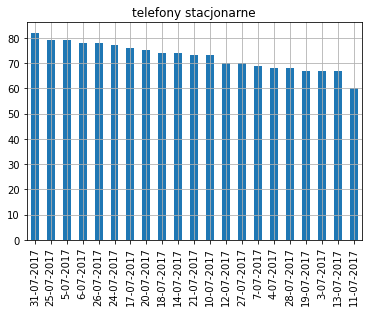

In [13]:
# 5.2
mask1 = (df["nr"].str.len() == 7)
counts1 = pd.value_counts(df.loc[mask1]["data"])
counts1.plot.bar(title="telefony stacjonarne", grid=True)

<AxesSubplot:title={'center':'telefony komorkowe'}>

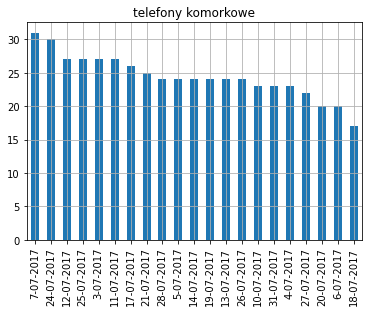

In [14]:
mask2 = (df["nr"].str.len() == 8)
counts2 = pd.value_counts(df.loc[mask2]["data"])
counts2.plot.bar(title="telefony komorkowe", grid=True)

In [15]:
# 5.3
mask1 = (df["nr"].str.len() == 7)
mask2 = (df["nr"].str.startswith("12"))
stac = df.loc[mask1].loc[mask2]

print("liczba polaczen     ", len(stac))
print("laczny czas trwania ", stac["len"].sum())

liczba polaczen      21
laczny czas trwania  203


In [16]:
# 5.4
pricefuncN = lambda x: 50 if x<800 else ceil((x-800)/100)
pricefuncR = lambda x: x

print("stacjonarne  ", df.loc[(df["nr"].str.len() == 7)].groupby("nr").sum().sort_values(by="len")["len"].apply(pricefuncN).sum())
print("komorkowe    ", df.loc[(df["nr"].str.len() == 8)].groupby("nr").sum().sort_values(by="len")["len"].apply(pricefuncN).sum())
print("zagraniczne  ", df.loc[(df["nr"].str.len() >  9)].groupby("nr").sum().sort_values(by="len")["len"].apply(pricefuncR).sum())

stacjonarne   65550
komorkowe     21400
zagraniczne   967
